In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir("/content/gdrive/")
!ls

MyDrive


In [4]:
df = pd.read_csv('MyDrive/Datasets/amazon/amazon.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

**DATA PREPROCESSING**

As the sentiment analysis focuses on the ratings and reviews, I will find missing values and clean the dataset

In [5]:
df['reviews.rating'].isnull().sum()

33

In [6]:
df['reviews.text'].isnull().sum()

1

Since the number of missing values is low and we have suffcient data, I will proceed to drop these rows 

In [7]:
df.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

We will use the user ratings to determine the sentiment of the product where a rating > 3 indicates a positive review, a rating <= 3 indicates a negative review

In [8]:
def get_senti(rate):
  if rate>3:
    return 'Positive'
  else:
    return 'Negative'

In [9]:
df['sentiment'] = df['reviews.rating'].apply(get_senti)
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,Positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,Positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,Positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,Positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris,Negative
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart,Negative
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson,Negative
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharg

I'll use a bar plot to visualize the amount of positive and negative reviews

Percentage of positive reviews = 93.3%
Percentage of negative reviews = 6.7%


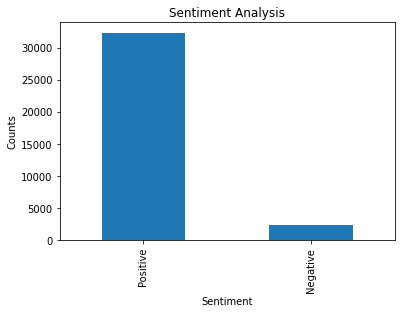

In [10]:
def senti_per(df):
  pos = df[df['sentiment']=='Positive']
  pospercent = round((pos.shape[0]/df.shape[0])*100, 1)
  print(f"Percentage of positive reviews = {pospercent}%")

  neg = df[df['sentiment']=='Negative']
  negpercent = round((neg.shape[0]/df.shape[0])*100, 1)
  print(f"Percentage of negative reviews = {negpercent}%")

senti_per(df)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

The dataset is highly imbalanced and will affect our model. 

Firstly, as the imbalance is towards positive reviews, I will decrease the size of such reviews by only considering 5 star reviews.

Secondly, I will merge this dataset with negative reviews from another 2 datasets provided.

In [11]:
df = df.drop(df[df['reviews.rating'] == 4.0].index)

In [12]:
df2 = pd.read_csv('MyDrive/Datasets/amazon/amazon2.csv')
df3 = pd.read_csv('MyDrive/Datasets/amazon/amazon3.csv')

Determine sentiment of the 2 new datasets before merging

In [13]:
df2['sentiment'] = df2['reviews.rating'].apply(get_senti)
df3['sentiment'] = df3['reviews.rating'].apply(get_senti)

To decrease the imbalance, I will only use negative reviews in both datasets

In [14]:
df2.drop(df2[df2['sentiment']=='Positive'].index, inplace=True)
df3.drop(df3[df3['sentiment']=='Positive'].index, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26085 entries, 0 to 34659
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26085 non-null  object 
 1   name                  20647 non-null  object 
 2   asins                 26084 non-null  object 
 3   brand                 26085 non-null  object 
 4   categories            26085 non-null  object 
 5   keys                  26085 non-null  object 
 6   manufacturer          26085 non-null  object 
 7   reviews.date          26066 non-null  object 
 8   reviews.dateAdded     17848 non-null  object 
 9   reviews.dateSeen      26085 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   25597 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    25651 non-null  float64
 14  reviews.rating        26085 non-null  float64
 15  reviews.sourceURLs 

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 28318
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2787 non-null   object 
 1   dateAdded            2787 non-null   object 
 2   dateUpdated          2787 non-null   object 
 3   name                 2787 non-null   object 
 4   asins                2787 non-null   object 
 5   brand                2787 non-null   object 
 6   categories           2787 non-null   object 
 7   primaryCategories    2787 non-null   object 
 8   imageURLs            2787 non-null   object 
 9   keys                 2787 non-null   object 
 10  manufacturer         2787 non-null   object 
 11  manufacturerNumber   2787 non-null   object 
 12  reviews.date         2787 non-null   object 
 13  reviews.dateSeen     2787 non-null   object 
 14  reviews.didPurchase  0 non-null      object 
 15  reviews.doRecommend  1077 non-null   

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 4975
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   314 non-null    object 
 1   dateAdded            314 non-null    object 
 2   dateUpdated          314 non-null    object 
 3   name                 314 non-null    object 
 4   asins                314 non-null    object 
 5   brand                314 non-null    object 
 6   categories           314 non-null    object 
 7   primaryCategories    314 non-null    object 
 8   imageURLs            314 non-null    object 
 9   keys                 314 non-null    object 
 10  manufacturer         314 non-null    object 
 11  manufacturerNumber   314 non-null    object 
 12  reviews.date         314 non-null    object 
 13  reviews.dateAdded    47 non-null     object 
 14  reviews.dateSeen     314 non-null    object 
 15  reviews.doRecommend  314 non-null    bo

The datasets have different columns. To facilitate merging, I will pick columns that are relevant for the purpose of this analysis

They are:
- name
- brand
- categories
- manufacturer
- reviews.doRecommend
- reviews.rating
- reviews.text
- reviews.title
- sentiment

In [18]:
df = df.filter(['name', 'brand', 'categories', 'manufacturer', 'reviews.doRecommend', 'reviews.rating', 'reviews.rating', 'reviews.text',
                 'reviews.title', 'sentiment'], axis=1)
df.head()

,name,brand,categories,manufacturer,reviews.doRecommend,reviews.rating,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,This product so far has not disappointed. My c...,Kindle,Positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,great for beginner or experienced person. Boug...,very fast,Positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,Positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,Positive
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,Positive


In [19]:
df2 = df2.filter(['name', 'brand', 'categories', 'manufacturer', 'reviews.doRecommend', 'reviews.rating', 'reviews.rating', 'reviews.text',
                 'reviews.title', 'sentiment'], axis=1)
df3 = df3.filter(['name', 'brand', 'categories', 'manufacturer', 'reviews.doRecommend', 'reviews.rating', 'reviews.rating', 'reviews.text',
                 'reviews.title', 'sentiment'], axis=1)

In [20]:
data = pd.concat([df, df2, df3])
# drop duplicates
data.drop_duplicates(inplace=True, ignore_index=True)
data.reset_index(inplace=True)

Percentage of positive reviews = 81.7%
Percentage of negative reviews = 18.3%


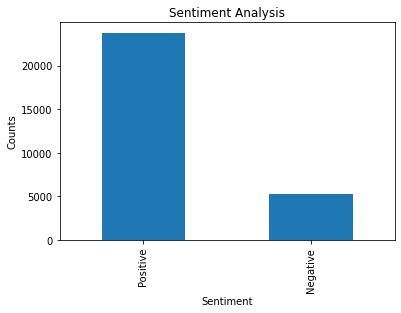

In [21]:
senti_per(data)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['sentiment'].value_counts().plot(kind='bar')
plt.show()

With all the reviews, I will proceed to clean the data by
- converting everything to lowercase
- removing punctuations
- removing stopwords

I will store them in a new column 'reviews.clean'

In [22]:
import re

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
def contractions(text):
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"wouldn't", "would not", text)
  text = re.sub(r"couldn't", "could not", text)
  text = re.sub(r"\'d", "would", text)
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  return text

def clean_text(text):
  text = text.lower()
  text = contractions(text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'[^A-Za-z]+', ' ', text)
  return text

In [33]:
data['reviews.clean'] = data['reviews.text']
data['reviews.clean'] = data['reviews.clean'].apply(str)
data['reviews.clean'] = data['reviews.clean'].apply(clean_text)

In [ ]:
data

,index,name,brand,categories,manufacturer,reviews.doRecommend,reviews.rating,reviews.rating,reviews.text,reviews.title,sentiment,reviews.clean
0,0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,This product so far has not disappointed. My c...,Kindle,Positive,this product so far has not disappointed my ch...
1,1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,great for beginner or experienced person. Boug...,very fast,Positive,great for beginner or experienced person bough...
2,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,Positive,inexpensive tablet for him to use and learn on...
3,3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,Positive,i bought this for my grand daughter when she c...
4,4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,5.0,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,Positive,this amazon fire inch tablet is the perfect si...
...,...,...,...,...,...,...,...,...,...,...,...,...
29077,29077,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Amazon,False,2.0,2.0,The battery is having more and more trouble ho...,The size is great for taking on the road,Negative,the battery is having more and more trouble ho...
29078,29078,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Amazon,True,3.0,3.0,My daughter has had this tablet for almost 2 m...,Great tablet for child.,Negative,my daughter has had this tablet for almost mon...
29079,29079,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Amazon,False,1.0,1.0,Very cheap and was not impressed at all never ...,Not good,Negative,very cheap and was not impressed at all never ...
29080,29080,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Amazon,False,2.0,2.0,"Hard to use, Lots of ads, and Randomly closes ...",Not a huge fan,Negative,hard to use lots of ads and randomly closes apps


**Dealing with the imbalance**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['reviews.clean'], data['sentiment'], test_size=0.25, random_state=42)
print("Train: ", X_train.shape, Y_train.shape, "Test: ", X_test.shape,Y_test.shape)

Train:  (21811,) (21811,) Test:  (7271,) (7271,)


In [36]:
# undersample majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_res, y_res = rus.fit_resample(X_train.values.reshape(-1,1), Y_train)

In [37]:
y_res.value_counts()

Negative    4011
Positive    4011
Name: sentiment, dtype: int64

**Feature Extractions using TF-IDF** 

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))
sw.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, stop_words=sw, ngram_range=(1,2))
x_train_vect = vectorizer.fit_transform(x_res.flatten())
x_test_vect = vectorizer.transform(X_test)

**Classification**

In [40]:
list(X_test)[0]

'great for streaming movies and amazon easy set up would defiantly recommend this product'


Linear SVM

In [41]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train_vect, y_res)
clf_svm.predict(x_test_vect[0])

array(['Positive'], dtype=object)

Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train_vect.toarray(), y_res)
clf_gnb.predict(x_test_vect[0].toarray())

array(['Positive'], dtype='<U8')

Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(x_train_vect, y_res)
clf_log.predict(x_test_vect[0])

array(['Positive'], dtype=object)

Desicion Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train_vect, y_res)
clf_dec.predict(x_test_vect[0])

array(['Positive'], dtype=object)

**Evaluating the Models**

In [45]:
svm_score = clf_svm.score(x_test_vect, Y_test)
gnb_score = clf_gnb.score(x_test_vect.toarray(), Y_test)
log_score = clf_log.score(x_test_vect, Y_test)
dec_score = clf_dec.score(x_test_vect, Y_test)
print(f'Linear SVM: {svm_score}')
print(f'Guassian NB: {gnb_score}')
print(f'Logistic Regression: {log_score}')
print(f'Decision Tree: {dec_score}')

Linear SVM: 0.9141796176591941
Guassian NB: 0.8403245770870582
Logistic Regression: 0.9053775271627011
Decision Tree: 0.8313849539265575


In [46]:
from sklearn.metrics import f1_score
svm_f1 = f1_score(Y_test, clf_svm.predict(x_test_vect), average=None)
gnb_f1 = f1_score(Y_test, clf_gnb.predict(x_test_vect.toarray()), average=None)
log_f1 = f1_score(Y_test, clf_log.predict(x_test_vect), average=None)
dec_f1 = f1_score(Y_test, clf_dec.predict(x_test_vect), average=None)
print("f1-score for the models:")
print(f'Linear SVM: {svm_f1}')
print(f'Guassian NB: {gnb_f1}')
print(f'Logistic Regression: {log_f1}')
print(f'Decision Tree: {dec_f1}')

f1-score for the models:
Linear SVM: [0.78746594 0.94623471]
Guassian NB: [0.62919195 0.89825607]
Logistic Regression: [0.77066667 0.94039161]
Decision Tree: [0.63962375 0.88994614]


**Testing the Models**

In [48]:
def model_testing(model, test_set):
  test_set_vect = vectorizer.transform(test_set)
  if model == clf_gnb:
    test_set_vect = test_set_vect.toarray()
  return model.predict(test_set_vect)

def match(results, model):
  sum=0
  for i in range(len(results)):
    if results[i] == model[i]:
      sum+=1
  return sum

In [49]:
test_set = ['The product was good and easy to  use', 'battery life is awful', 'product is user friendly', 'terrible tablet', 'product is not good']
results = ['Positive', 'Negative', 'Positive', 'Negative', 'Negative']

In [51]:
print(f'Predicting results for test_set:\nExpected results: {results}\n')
print(f'Linear SVM: {model_testing(clf_svm, test_set)}\tMatch: {match(results, model_testing(clf_svm, test_set))}/{len(results)}')
print(f'Gaussian NB: {model_testing(clf_gnb, test_set)}\tMatch: {match(results, model_testing(clf_gnb, test_set))}/{len(results)}')
print(f'Logistic Regression: {model_testing(clf_log, test_set)}\tMatch: {match(results, model_testing(clf_log, test_set))}/{len(results)}')
print(f'Desicion Tree: {model_testing(clf_dec, test_set)}\tMatch: {match(results, model_testing(clf_dec, test_set))}/{len(results)}')

Predicting results for test_set:
Expected results: ['Positive', 'Negative', 'Positive', 'Negative', 'Negative']

Linear SVM: ['Positive' 'Negative' 'Positive' 'Negative' 'Negative']	Match: 5/5
Gaussian NB: ['Positive' 'Positive' 'Positive' 'Negative' 'Positive']	Match: 3/5
Logistic Regression: ['Positive' 'Negative' 'Positive' 'Negative' 'Negative']	Match: 5/5
Desicion Tree: ['Positive' 'Negative' 'Positive' 'Negative' 'Negative']	Match: 5/5


As expected, the Guassian NB classifier is the worst performing model. I will fine tune the other 3 models to achieve better accuracy.

**Fine Tuning with Grid Search**

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C': (1, 4, 8, 16, 32)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train_vect, y_res)
print('Best parameters for Linear SVM:')
print(clf.best_params_)

Best parameters for Linear SVM:
{'C': 8, 'kernel': 'rbf'}


In [53]:
clf_tuned_svm = svm.SVC(kernel='rbf', C=8)
clf_tuned_svm.fit(x_train_vect, y_res)
tuned_svm_score = clf_tuned_svm.score(x_test_vect, Y_test)
tuned_svm_f1 = f1_score(Y_test, clf_tuned_svm.predict(x_test_vect), average=None)
print(f'Score for tuned Linear SVM: {tuned_svm_score}')
print(f'f1-score for tuned Linear SVM: {tuned_svm_f1}')

Score for tuned Linear SVM: 0.9214688488516023
f1-score for tuned Linear SVM: [0.80235376 0.95099974]


In [56]:
parameters = {'penalty': ('l1', 'l2'), 'solver' : ('newton-cg', 'lbfgs', 'liblinear'), 'C': (1, 4, 8, 16, 32), }
logreg = LogisticRegression()
clf2 = GridSearchCV(logreg, parameters, cv=5)
clf2.fit(x_train_vect, y_res)
print('Best parameters for Logistic Regression:')
print(clf2.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameters for Logistic Regression:
{'C': 4, 'penalty': 'l2', 'solver': 'newton-cg'}


In [57]:
clf_tuned_log = LogisticRegression(C=4, penalty='l2', solver='newton-cg')
clf_tuned_log.fit(x_train_vect, y_res)
tuned_log_score = clf_tuned_log.score(x_test_vect, Y_test)
tuned_log_f1 = f1_score(Y_test, clf_tuned_log.predict(x_test_vect), average=None)
print(f'Score for tuned Logistic Regression: {tuned_log_score}')
print(f'f1-score for tuned Logistic Regression: {tuned_log_f1}')

Score for tuned Logistic Regression: 0.9122541603630863
f1-score for tuned Logistic Regression: [0.78518519 0.94486692]


In [61]:
parameters = {'criterion': ('gini', 'entropy'), 'splitter' : ('best', 'random'), 'max_depth': (128, 256, 512, 1024)}
dectree = DecisionTreeClassifier()
clf3 = GridSearchCV(dectree, parameters, cv=5)
clf3.fit(x_train_vect, y_res)
print('Best parameters for Decision Tree:')
print(clf3.best_params_)

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 512, 'splitter': 'random'}


In [62]:
clf_tuned_dec = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=512)
clf_tuned_dec.fit(x_train_vect, y_res)
tuned_dec_score = clf_tuned_dec.score(x_test_vect, Y_test)
tuned_dec_f1 = f1_score(Y_test, clf_tuned_dec.predict(x_test_vect), average=None)
print(f'Score for tuned Decision Tree: {tuned_dec_score}')
print(f'f1-score for tuned Decision Tree: {tuned_dec_f1}')

Score for tuned Decision Tree: 0.845963416311374
f1-score for tuned Decision Tree: [0.65707287 0.900674  ]


Summary of results

In [79]:
print('\t\tLinear SVM\t\t\tLogistic Regression\t\t\tDecision Tree')
print('-'*115)
print(f'score\t\t{svm_score}\t\t{log_score}\t\t\t{dec_score}')
print('-'*115)
print(f'f1\t\t{svm_f1}\t\t{log_f1}\t\t\t{dec_f1}')
print('-'*115)
print(f'tuned score\t{tuned_svm_score}\t\t{tuned_log_score}\t\t\t{tuned_dec_score}')
print('-'*115)
print(f'tuned f1\t{tuned_svm_f1}\t\t{tuned_log_f1}\t\t\t{tuned_dec_f1}')

		Linear SVM			Logistic Regression			Decision Tree
-------------------------------------------------------------------------------------------------------------------
score		0.9141796176591941		0.9053775271627011			0.8313849539265575
-------------------------------------------------------------------------------------------------------------------
f1		[0.78746594 0.94623471]		[0.77066667 0.94039161]			[0.63962375 0.88994614]
-------------------------------------------------------------------------------------------------------------------
tuned score	0.9214688488516023		0.9122541603630863			0.845963416311374
-------------------------------------------------------------------------------------------------------------------
tuned f1	[0.80235376 0.95099974]		[0.78518519 0.94486692]			[0.65707287 0.900674  ]


There are slight improvements after tuning the parameters of the models. We can see that Linear SVM has achieved the highest accuracy

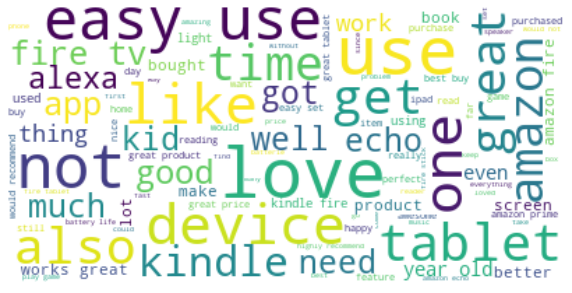

In [85]:
from wordcloud import WordCloud
def plt_wc(df):
  words = ' '.join(wd for wd in df['reviews.clean'])
  wordCloud = WordCloud(stopwords=sw, background_color='white', max_words=100, random_state=21, max_font_size=50).generate(words)

  plt.figure(figsize = (10, 12), facecolor = None) 
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

plt_wc(data)